In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

## Zadanie 1
    
Wczytaj dane z pliku **PersonalData.csv**.
    
Oblicz odległość euklidesową \(d(A, B)\) między dwoma wybranymi rekordami \(A\) i \(B\).
    
Zmodyfikuj skalę dla atrybutu **zarobki** (przeskaluj jednostki z tysięcy na złote) i ponownie oblicz odległość euklidesową. Jak zmiana skali wpływa na wynik?
    
Aby wyeliminować wpływ skali, podziel wartość każdego atrybutu przez jego odchylenie standardowe. Oblicz ponownie odległość euklidesową dla przeskalowanych danych.
    
Dla punktów \(A\) i \(B\) oblicz także odległość Minkowskiego oraz odległość miejską (Manhattan).

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial import distance

df = pd.read_csv('PersonalData.csv', index_col=0)
numeric_df = df.select_dtypes(include=[np.number])
A = numeric_df.loc['A']
B = numeric_df.loc['B']

dist_euclidean_orig = distance.euclidean(A, B)
df_scaled_zarobki = numeric_df.copy()
df_scaled_zarobki['Zarobki (tys.)'] = df_scaled_zarobki['Zarobki (tys.)'] * 1000
dist_euclidean_scaled_zarobki = distance.euclidean(df_scaled_zarobki.loc['A'], df_scaled_zarobki.loc['B'])

stds = numeric_df.std()
df_std = numeric_df / stds
dist_euclidean_std = distance.euclidean(df_std.loc['A'], df_std.loc['B'])

dist_manhattan = distance.cityblock(A, B)
dist_minkowski_p3 = distance.minkowski(A, B, p=3)

print(f"Odległość euklidesowa (oryginalna): {dist_euclidean_orig:.4f}")
print(f"Odległość euklidesowa (zarobki w zł): {dist_euclidean_scaled_zarobki:.4f}")
print(f"Odległość euklidesowa (po standaryzacji): {dist_euclidean_std:.4f}")
print(f"Odległość miejska (Manhattan): {dist_manhattan:.4f}")
print(f"Odległość Minkowskiego (p=3): {dist_minkowski_p3:.4f}")

Odległość euklidesowa (oryginalna): 30.6046
Odległość euklidesowa (zarobki w zł): 800.5848
Odległość euklidesowa (po standaryzacji): 4.0000
Odległość miejska (Manhattan): 68.8000
Odległość Minkowskiego (p=3): 24.5246


## Zadanie 2

Napisz program pozwalający obliczać podobieństwo między sekwencjami DNA traktowanymi jako ciągi znaków.

Zaimplementować na podstawie metryki
$$
D(x, y) = |x| + |y| - 2|LCS(x,y)|
$$

gdzie LCS oznacza najdłuszą wspólna podsekwencję (ang.
longest common subsequence)
  
  (LCS(x,y) = bcde). D(x, y) = 3

In [ ]:
x = "abcde"
y = "bcdxye"
print(get_D_x_y(x, y)) # Oczekiwany wynik 3

X = "AGGTAB"
Y = "GXTXAYB"
print(get_D_x_y(X, Y)) # Oczekiwany wynik 5

In [ ]:
def lcs_length(x, y):
    m = len(x)
    n = len(y)
    L = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0 or j == 0:
                L[i][j] = 0
            elif x[i-1] == y[j-1]:
                L[i][j] = L[i-1][j-1] + 1
            else:
                L[i][j] = max(L[i-1][j], L[i][j-1])

    return L[m][n]

def get_D_x_y(x, y):
    len_x = len(x)
    len_y = len(y)
    len_lcs = lcs_length(x, y)

    return len_x + len_y - 2 * len_lcs

x = "abcde"
y = "bcdxye"
print(f"Wynik dla x='{x}', y='{y}': {get_D_x_y(x, y)}") # oczekiwany 3

X = "AGGTAB"
Y = "GXTXAYB"
print(f"Wynik dla X='{X}', Y='{Y}': {get_D_x_y(X, Y)}") # oczekiwany 5

Wynik dla x='abcde', y='bcdxye': 3
Wynik dla X='AGGTAB', Y='GXTXAYB': 5


## Zadanie 3

Masz opisy trzech filmów
- `film1 = "kosmiczna stacja astronauta planeta obca"`
- `film2 = "astronauta rakieta księżyc misja kosmiczna"`
- `film3 = "wampir zamek noc krew mroczny"`

a. Stwórz reprezentację wektorową dla każdego filmu używając CountVectorizer

b. Oblicz podobieństwo cosinusowe między wszystkimi parami filmów

c. Które dwa filmy są najbardziej podobne? Które najmniej?

d . Dodaj czwarty film i sprawdź do którego jest najbardziej podobny:
    `film4 = "rakieta mars astronauta czerwona planeta"`

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

filmy = [
    "kosmiczna stacja astronauta planeta obca",
    "astronauta rakieta księżyc misja kosmiczna",
    "wampir zamek noc krew mroczny"
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(filmy)

df_vectors = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=['film1', 'film2', 'film3'])
print("Reprezentacja wektorowa:")
print(df_vectors)
print("-" * 30)

similarity_matrix = cosine_similarity(X)
df_sim = pd.DataFrame(similarity_matrix, columns=['film1', 'film2', 'film3'], index=['film1', 'film2', 'film3'])

print("Macierz podobieństwa cosinusowego:")
print(df_sim)
print("-" * 30)

film4 = ["rakieta mars astronauta czerwona planeta"]
X4 = vectorizer.transform(film4)

sim_film4 = cosine_similarity(X4, X)
df_sim4 = pd.DataFrame(sim_film4, columns=['film1', 'film2', 'film3'], index=['film4'])

print("Podobieństwo filmu 4 do pozostałych:")
print(df_sim4)

Reprezentacja wektorowa:
       astronauta  kosmiczna  krew  księżyc  misja  mroczny  noc  obca  \
film1           1          1     0        0      0        0    0     1   
film2           1          1     0        1      1        0    0     0   
film3           0          0     1        0      0        1    1     0   

       planeta  rakieta  stacja  wampir  zamek  
film1        1        0       1       0      0  
film2        0        1       0       0      0  
film3        0        0       0       1      1  
------------------------------
Macierz podobieństwa cosinusowego:
       film1  film2  film3
film1    1.0    0.4    0.0
film2    0.4    1.0    0.0
film3    0.0    0.0    1.0
------------------------------
Podobieństwo filmu 4 do pozostałych:
          film1     film2  film3
film4  0.516398  0.516398    0.0


## Zadanie 4

A. Wczytaj dane z pliku **k_means_data.csv.**

B. Zastosuj **algorytm hierarchiczny aglomeracyjny** i wyszukaj w zbiorze danych klastry.

C. Zastosuj **algorytm k-średnich** i wyszukaj w zbiorze danych klastry.

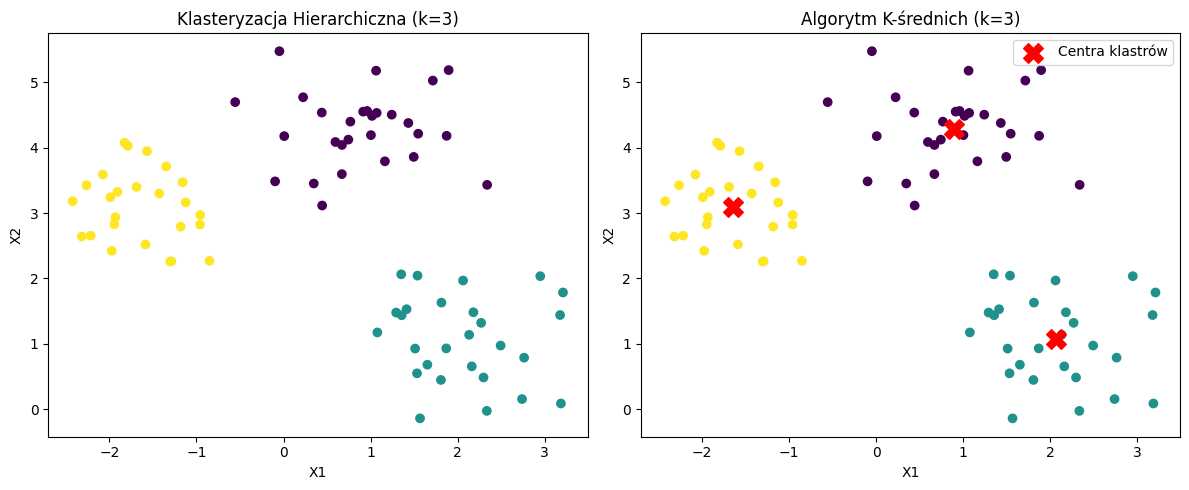

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans

df = pd.read_csv('k_means_data.csv')
n_clusters = 3
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
hierarchical_labels = hierarchical.fit_predict(df)

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(df.iloc[:, 0], df.iloc[:, 1], c=hierarchical_labels, cmap='viridis')
ax1.set_title(f'Klasteryzacja Hierarchiczna (k={n_clusters})')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax2.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kmeans_labels, cmap='viridis')
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centra klastrów')
ax2.set_title(f'Algorytm K-średnich (k={n_clusters})')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.legend()

plt.tight_layout()
plt.savefig('clustering_results.png')

## Zadanie 5

Zaimplementuj samodzielnie **algorytm k-średnich** dla danych z pliku **k_means_data.csv**.

Konwergencja osiągnięta po 5 iteracjach.


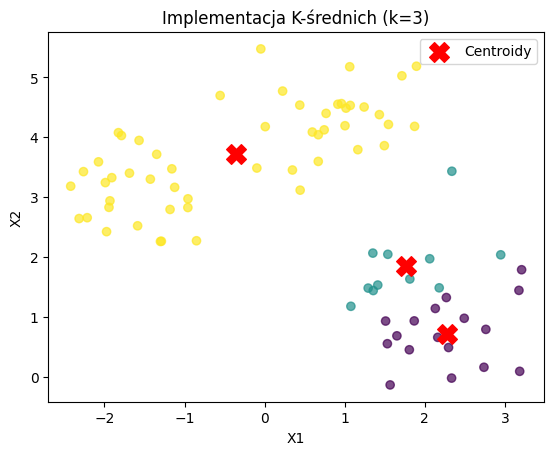

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('k_means_data.csv')
X = df.values

def kmeans_manual(X, k, max_iters=100):
    np.random.seed(42)
    indices = np.random.choice(len(X), k, replace=False)
    centroids = X[indices]

    for i in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        if np.all(centroids == new_centroids):
            print(f"Konwergencja osiągnięta po {i} iteracjach.")
            break
        centroids = new_centroids

    return centroids, labels

k = 3
centroids, labels = kmeans_manual(X, k)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroidy')
plt.title(f'Implementacja K-średnich (k={k})')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.savefig('manual_kmeans.png')

## Zadanie 6

1. Załaduj zbiór danych **iris**.
Opis zbioru: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
2. Narysuj wykres rozrzutu dla współrzędnych **sepal_length** i **sepal_width**. Oznacz różnymi
kolorami i marklami różne klasy kwiatów.
3. Znajdź wartości **minimalne, maksymalne** oraz **średnie odchylenie kwadratowe** dla atrybutów zbioru.
4. Policz **współczynniki korelacji** między atrybutami.
5. Zastosuj **algorytm k-średnich** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.
6. Zastosuj **algorytm hierarchiczny aglomeracyjny** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.

In [ ]:
# Wczytanie zbioru danych Iris
iris = datasets.load_iris()

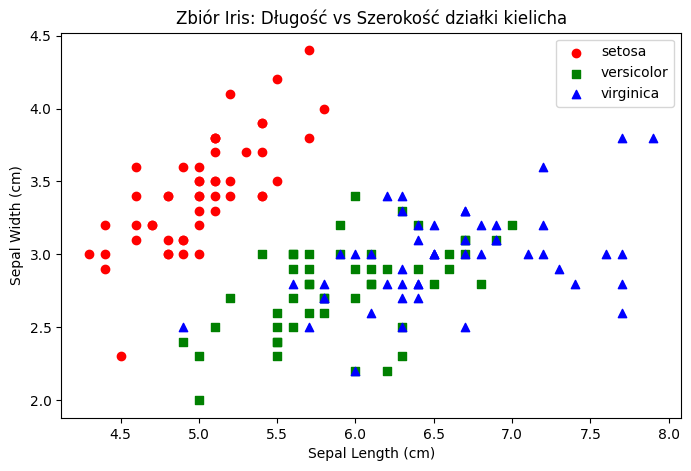

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering

iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

plt.figure(figsize=(8, 5))
markers = ['o', 's', '^']
colors = ['red', 'green', 'blue']

for i in range(len(iris.target_names)):
    subset = df[df['target'] == i]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'],
                c=colors[i], marker=markers[i], label=iris.target_names[i])

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Zbiór Iris: Długość vs Szerokość działki kielicha')
plt.legend()
plt.show()

stats = df.drop(columns='target').agg(['min', 'max', 'var'])
correlation = df.drop(columns='target').corr()

X_sepal = df[['sepal length (cm)', 'sepal width (cm)']]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['kmeans_cluster'] = kmeans.fit_predict(X_sepal)

hierarchical = AgglomerativeClustering(n_clusters=3)
df['hierarchical_cluster'] = hierarchical.fit_predict(X_sepal)

## Zadanie 7
Dla danych z pliku penguins.csv wykonaj polecenia

Wyświetl podstawowe informacje o zbiorze.
1. Sprawdź czy w zbiorze nie brakuje danych. Jeżeli są – usuń je ().
2. Ogranicz się do atrybutów **bill_length_mm** i **flipper_length_mm**.
3. Narysuj dendogram, zinterpretuj go i wyznacz ilość klastrów.
4. Zastosuj algorytm hierarchiczny aglomeracyjny do zbioru i wyznacz klastry.
5. Stwórz wykres rozrzutu z zaznaczonymi klastrami.

W **punktach 3-5** przetestuj różne sposoby obliczenia odległości między klastrami (linkage-complete, average, single, ward).

Dane z https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv

In [ ]:
df = pd.read_csv("PersonalData.csv", index_col=0, delimiter=",")

In [ ]:
df

,Wzrost (cm),Waga (kg),Staz (lata),Zarobki (tys.),Ocena (pkt.),Piętro,Dzieci,Odleglosc (km),Ubezp.
A,190,88,3,3.5,7,6,1,25,Tak
B,172,70,12,4.3,5,1,4,12,Nie


In [ ]:
df.loc['A']

,A
Wzrost (cm),190
Waga (kg),88
Staz (lata),3
Zarobki (tys.),3.5
Ocena (pkt.),7
Piętro,6
Dzieci,1
Odleglosc (km),25
Ubezp.,Tak


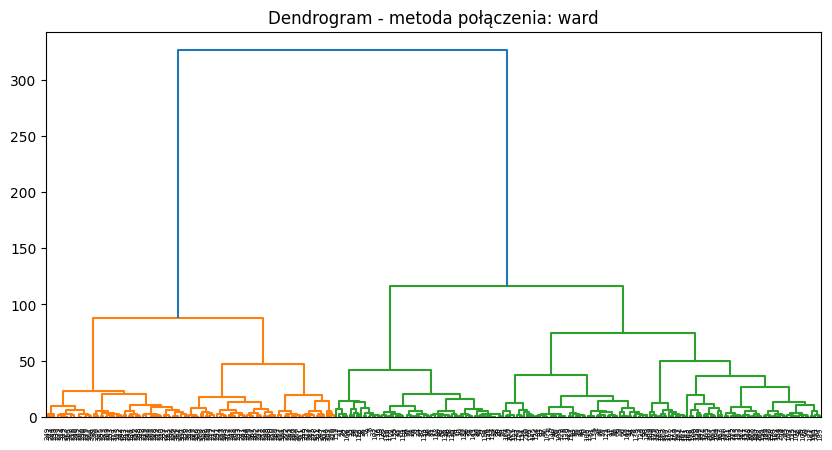

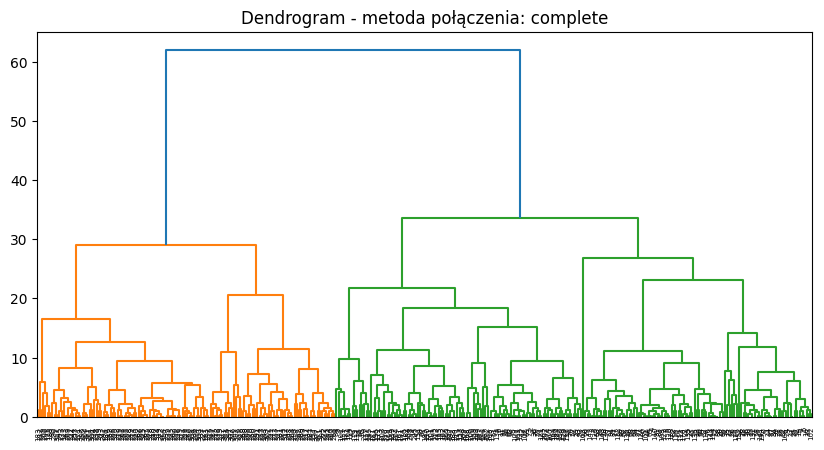

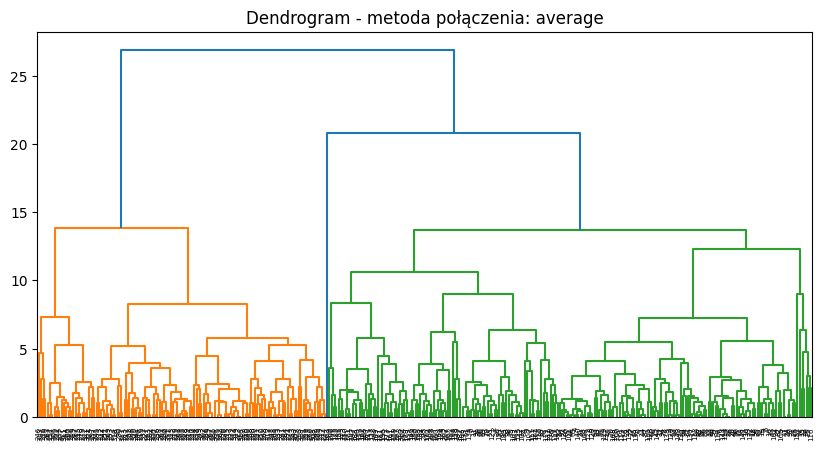

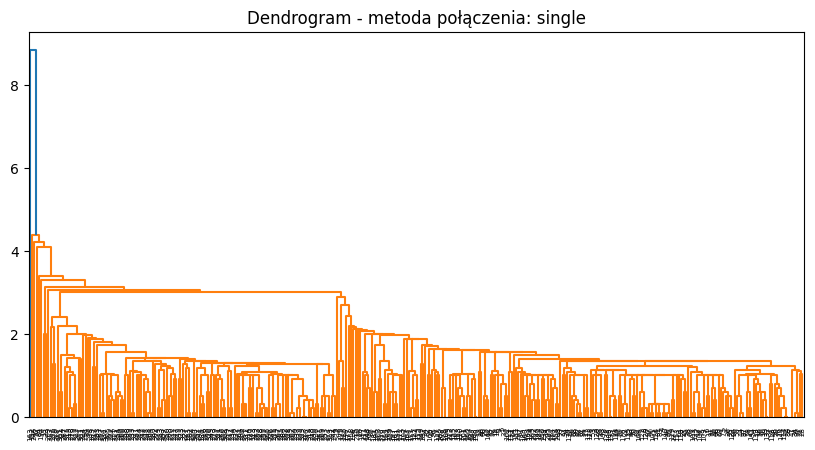

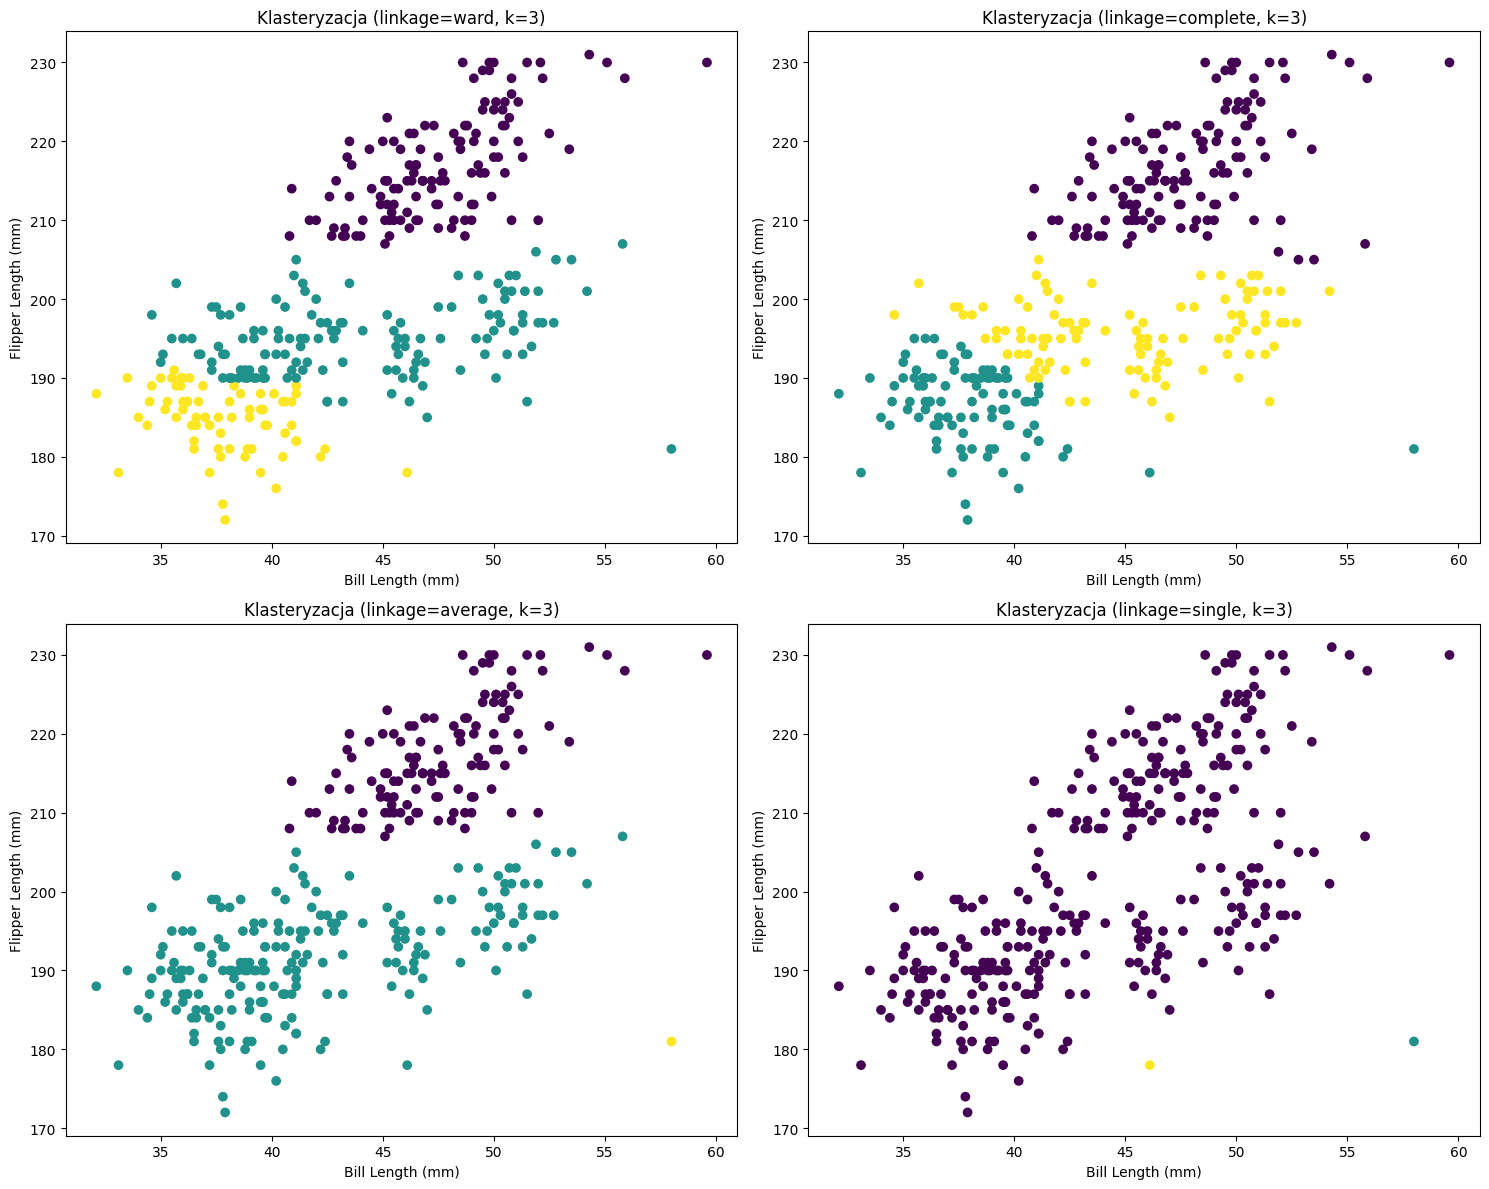

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

df = pd.read_csv('penguins.csv').dropna()
X = df[['bill_length_mm', 'flipper_length_mm']]
methods = ['ward', 'complete', 'average', 'single']

for method in methods:
    plt.figure(figsize=(10, 5))
    Z = linkage(X, method=method)
    dendrogram(Z)
    plt.title(f'Dendrogram - metoda połączenia: {method}')
    plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, method in enumerate(methods):
    model = AgglomerativeClustering(n_clusters=3, linkage=method)
    clusters = model.fit_predict(X)

    axes[i].scatter(X['bill_length_mm'], X['flipper_length_mm'], c=clusters, cmap='viridis')
    axes[i].set_title(f'Klasteryzacja (linkage={method}, k=3)')
    axes[i].set_xlabel('Bill Length (mm)')
    axes[i].set_ylabel('Flipper Length (mm)')

plt.tight_layout()
plt.show()